In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

In [2]:
# plotting defaults
plt.rc('figure', figsize=(20, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Use SAAS data

In [3]:
df = pd.read_csv('saas.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month_Invoiced     790458 non-null  object 
 1   Customer_Id        790458 non-null  int64  
 2   Invoice_Id         790458 non-null  int64  
 3   Subscription_Type  790458 non-null  float64
 4   Amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [5]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [8]:
df['Month_Invoiced'] = pd.to_datetime(df['Month_Invoiced'])
df = df.set_index('Month_Invoiced').sort_index()

In [9]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Month_Invoiced', length=790458)

### 1. Split data (train/test) and resample by any period except daily. Aggregate using the sum.

In [11]:
saas = df.resample('M')[['Amount']].sum()

In [12]:
saas.index.year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            2017, 2017, 2017, 2017],
           dtype='int64', name='Month_Invoiced')

In [13]:
# split into train, validation, test
train = saas[:'2016']
test = saas['2017':]

plt.plot(train.index, train.Amount)
plt.plot(test.index, test.Amount)
plt.show()

In [21]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(test[target_var], label='Test', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [25]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse

### 2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
#### Simple Average

In [26]:
# compute simple average
avg_amount = round(train['Amount'].mean(), 2)
avg_amount

47916.67

In [32]:
yhat_df = pd.DataFrame({'Amount': [avg_amount]},
                          index=test.index)

In [33]:
yhat_df

,Amount
Month_Invoiced,
2017-01-31,47916.67
2017-02-28,47916.67
2017-03-31,47916.67
2017-04-30,47916.67
2017-05-31,47916.67
2017-06-30,47916.67
2017-07-31,47916.67
2017-08-31,47916.67
2017-09-30,47916.67


Amount -- RMSE: 5700


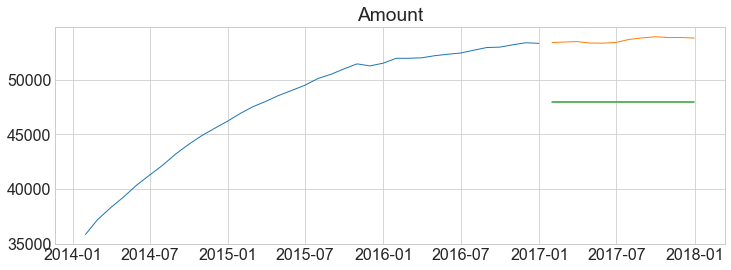

In [34]:
plot_and_eval('Amount')

#### Moving Average

#### Holt's Linear Trend Model

#### Based on previous year/month/etc., this is up to you.